#Manchester United, Pemain, Pelatih, hingga fans 

Manchester United(MU) merupakan Klub Sepak Bola di Inggris pada premiere League dan memiliki pemain-pemain hebat serta pelatih baru. Akhir-akhir ini MU sering dibacarakan di twitter baik dalam segi permainan, pelatih, karena MU ini dianggap klub hebat yang memiliki pemain hebat tetapi pelatih lamanya tidak bisa menggunakan para pemain hebat itu dengan baik sehingga banyak dihujat juga pelatihnya pada Twitter

## **A.Collecting Data Twitter**

# **A.Social Network Analysis: Manchester United**

In [ ]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import community
import seaborn as sns
import csv

### **Network Contruction**

In [ ]:
# Upload Local Dataset (Nodes) 
from google.colab import files
uploaded = files.upload()

Saving MU.csv to MU.csv


In [ ]:
df_tweets = pd.read_csv('MU.csv', sep =",")
df_tweets.head()

,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude
0,Manchester United vs Chelsea Live Stream Match...,False,0,NaN,2021-11-28 14:19:32,True,NaN,1464962163857047560,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",diamondrules1,0,False,False,NaN,NaN
1,RT @Iamzsekk92: @Cristiano is scoring his 800t...,False,0,NaN,2021-11-28 14:18:19,False,NaN,1464961857870045194,NaN,"<a href=""http://twitter.com/download/android"" ...",BruceTwi3,8,True,False,NaN,NaN
2,#ICYMI 🚀 Sputnik: Orbiting the World with @geo...,False,0,NaN,2021-11-28 14:17:59,True,NaN,1464961773979770884,NaN,"<a href=""http://twitter.com/download/iphone"" r...",RT_sputnik,0,False,False,NaN,NaN
3,RT @skworldfootball: Chelsea 🆚️ Manchester Uni...,False,0,NaN,2021-11-28 14:17:39,False,NaN,1464961691897065474,NaN,"<a href=""http://twitter.com/download/android"" ...",JokerJR03584860,2,True,False,NaN,NaN
4,Carrick's at the wheels Manchester United in S...,False,0,NaN,2021-11-28 14:16:06,False,NaN,1464961301965275143,NaN,"<a href=""http://twitter.com/download/android"" ...",el_adnaniy,0,False,False,NaN,NaN


In [ ]:
df_tweets2 = df_tweets.drop(['id','text','favorited','favoriteCount','created','truncated','replyToSID','replyToUID','statusSource','retweetCount','isRetweet','retweeted','longitude','latitude'], axis=1)
df_tweets2

,replyToSN,screenName
0,NaN,diamondrules1
1,NaN,BruceTwi3
2,NaN,RT_sputnik
3,NaN,JokerJR03584860
4,NaN,el_adnaniy
...,...,...
995,NaN,TheGoldenKop
996,NaN,mufcfanbabe
997,NaN,LFC_bot_v1
998,NaN,Getinthegoal1


In [ ]:
df_tweets2.rename(columns={'replyToSN': 'target', 'screenName': 'source'}, inplace=True)

In [ ]:
df_tweets2.head()

,target,source
0,NaN,diamondrules1
1,NaN,BruceTwi3
2,NaN,RT_sputnik
3,NaN,JokerJR03584860
4,NaN,el_adnaniy


**Visualize The Network**

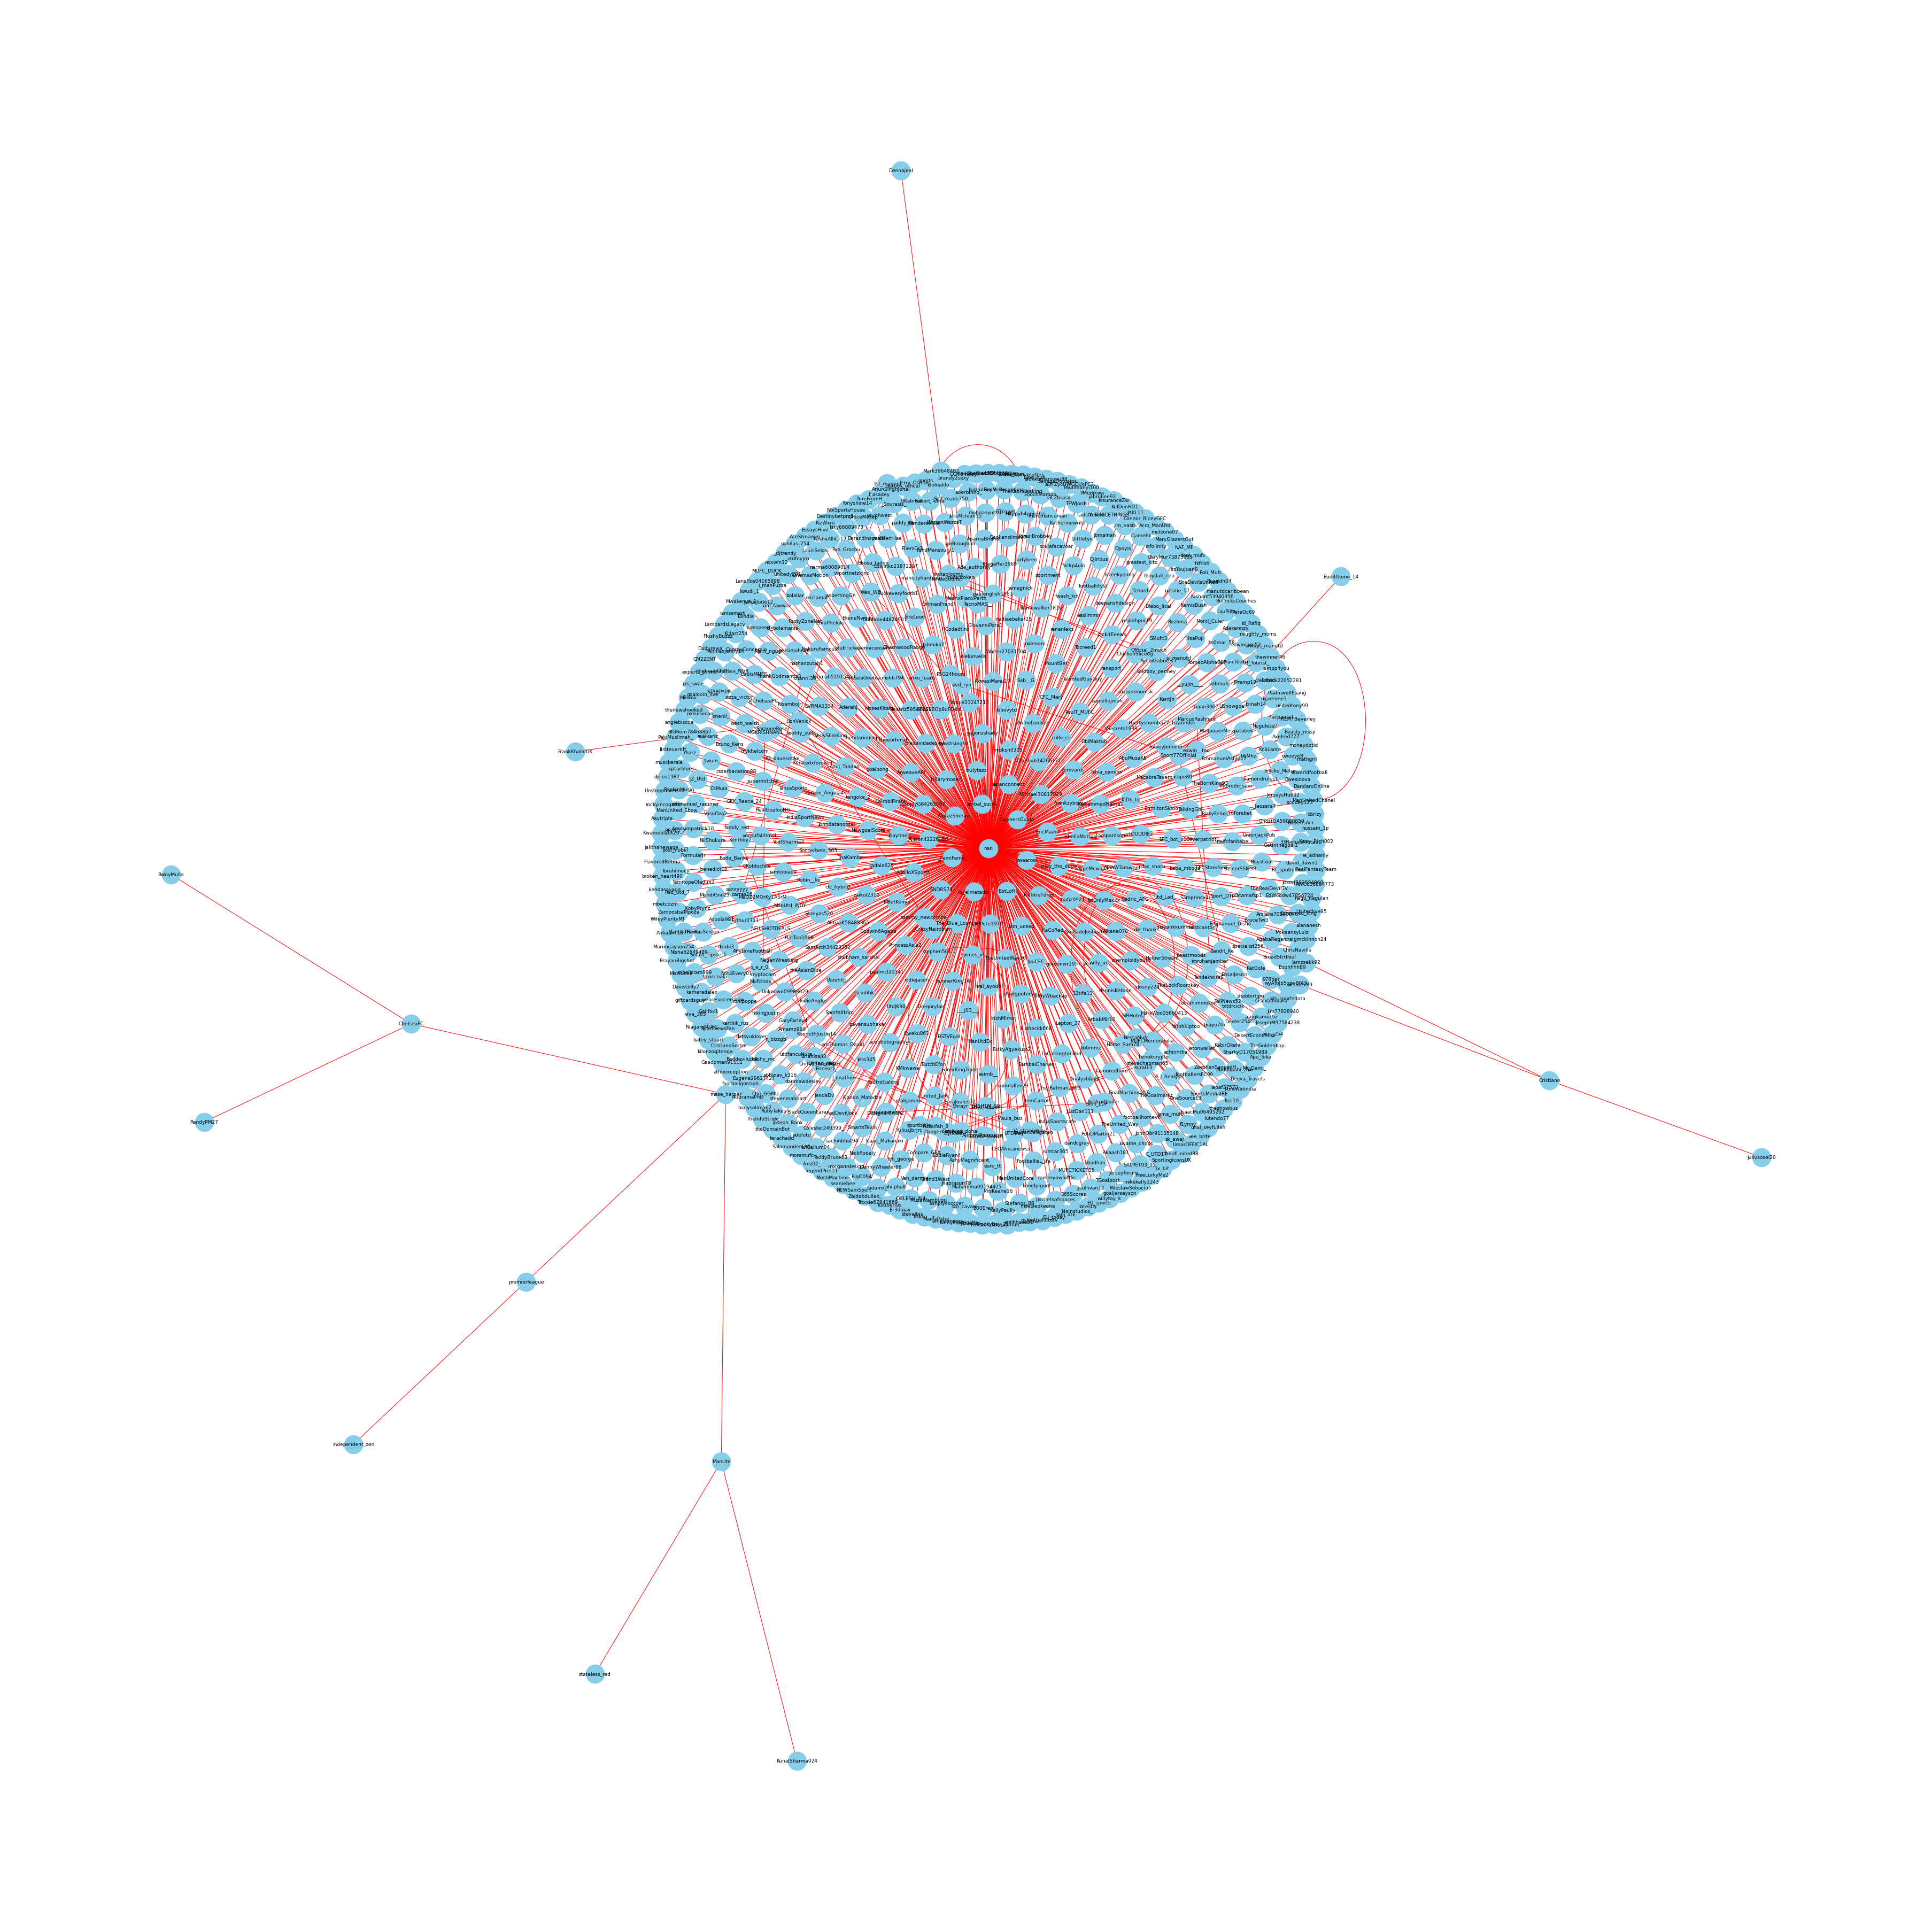

In [ ]:
# Contstruct a Network
G1 = nx.from_pandas_edgelist(df_tweets2)

# Visualize the Network
import matplotlib.pyplot as plt
plt.figure(figsize=(50,50))
nx.draw(G1, with_labels=True, 
        node_color='skyblue', node_size=1200, 
        arrowstyle='->',arrowsize=20, edge_color='r',
        font_size=9,
        pos=nx.kamada_kawai_layout(G1))

### **Network Metrics and Measurement**

Pada bagian Centrality ini paling atas adalah nan yang berarti kosong, dan tidak valid secara numerik sehingga kami mengambil yang tertinggi dibawah nan

Centrality Measurement

In [8]:
# Degree Centrality
degree = nx.degree_centrality(G1)

# Sorted from the Highest
sorted(nx.degree(G1), key=lambda x: x[1], reverse=True)[0:10]

[(nan, 721),
 ('mase_harper', 4),
 ('ManUnitedChanel', 3),
 ('Sport77Official', 3),
 ('Cristiano', 3),
 ('ChelseaFC', 3),
 ('HonVenick', 3),
 ('ManUtd', 3),
 ('Horse_Sam78', 3),
 ('Iamzsekk92', 2)]

Pada bagian Degree Centrality, mase_harper memiliki 4 koneksi yang berarti akun tersebut yang paling berpengaruh dalam jaringan ini

In [9]:
# Betweenness Centrality
betweenness = nx.betweenness_centrality(G1)

# Sorted from the Highest
sorted(nx.betweenness_centrality(G1, normalized=True).items(), key=lambda x:x[1], reverse=True)[0:10]

[(nan, 0.9047624677013494),
 ('mase_harper', 0.019634201948896358),
 ('ChelseaFC', 0.004934727171398172),
 ('ManUtd', 0.004934727171398172),
 ('Cristiano', 0.00247074122236671),
 ('Mark39648482', 0.002469052404032898),
 ('premierleague', 0.002469052404032898),
 ('Iamzsekk92', 0.002462297130697651),
 ('oitsme789', 0.002462297130697651),
 ('Sport77Official', 1.0132910002870991e-05)]

Dalam Betweeness centrality, mase_harper mempunyai nilai sebesar 0.01963 yang merupakan tertinggi dan yang paling dapat mengendalikan alur informasi

In [10]:
# Closeness Centrality
closeness = nx.closeness_centrality(G1)

# Sorted from the Highest
sorted(nx.closeness_centrality(G1).items(), key=lambda x:x[1], reverse=True)[0:10]

[(nan, 0.9290725296065749),
 ('mase_harper', 0.4753246753246753),
 ('Iamzsekk92', 0.4714602470700031),
 ('oitsme789', 0.4714602470700031),
 ('Mark39648482', 0.4708222765056324),
 ('Wex_WD', 0.47050393825241693),
 ('Vinnie33247213', 0.47050393825241693),
 ('diamondrules1', 0.47018603018603017),
 ('BruceTwi3', 0.47018603018603017),
 ('RT_sputnik', 0.47018603018603017)]

Dalam Closeness centrality, mase_harper memiliki nilai tertinggi 0.4753 yang berarti dapat menyebarkan informasi secara cepat dan ada hubungan yang paling banyak

In [11]:
# Eigenvector Centrality
eigenvector = nx.eigenvector_centrality_numpy(G1)

# Sorted from the Highest
sorted(nx.eigenvector_centrality_numpy(G1).items(), key=lambda x:x[1], reverse=True)[0:10]

[(nan, 0.7070619049700488),
 ('Vinnie33247213', 0.02734769754034383),
 ('Wex_WD', 0.02734769754034381),
 ('Horse_Sam78', 0.027347697540343805),
 ('ManUnitedChanel', 0.027347697540343788),
 ('mase_harper', 0.026439574808843166),
 ('oitsme789', 0.026402657009152057),
 ('Iamzsekk92', 0.026402657009152043),
 ('Mark39648482', 0.02636589328233629),
 ('Jama_mufc', 0.026329333185899646)]

Dalam Eigenvector, Vinnie33247213 merupakan akun dengan nilai tertinggi sebesar 0.027347 yang berarti paling baik dalam menghubungkan informasi antar nodesnya

**Network Topology Measurement**

In [12]:
# Show Number of Nodes
nx.number_of_nodes(G1)

771

Total nodes dalam jaringan ini adalah 771 

In [13]:
# Show Number of Edges
nx.number_of_edges(G1)

759

Total edges dalam jaringan ini adalah 759

In [14]:
# Show Graph Density
nx.density(G1)

0.002556976097832129

Density yang berarti kerapatan jaringan sebesar 0.00255697 pada data tersebut

In [15]:
# Show Number of Connected Component
nx.number_connected_components(G1)

20

number connected component dalam jaringan ini adalah sebesar 20